# Principal Component Analysis

This warm-up challenge will help you gain intuition about how a **Principal Component Analysis** works.  

## (1) Generate Data

We want a dataset with **100 observations** and **2 correlated features**

👇 Run the cell below to generate your data  
💡 Notice the (high) correlation between your two features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset with 100 observations and 2 correlated features.
seed = np.random.RandomState(42)
feature_1 = seed.normal(5, 1, 100)
feature_2 = .7 * feature_1 + seed.normal(0, .5, 100)
X = np.array([feature_1, feature_2]).T
X = pd.DataFrame(X)

X.corr().round(3)

,0,1
0,1.00,0.77
1,0.77,1.00


❓ Draw a scatter plot of your two features against each other

In [8]:
X.columns

RangeIndex(start=0, stop=2, step=1)

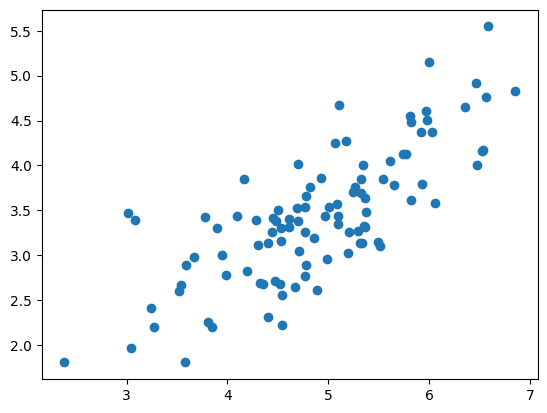

In [6]:
# YOUR CODE HERE
plt.scatter(X[0], X[1])

☝️ You can identify the positive correlation between the features  

Our observations are packed along a single line, it is not easy to spot differences between them

💡 PCA will help us find the directions (the so-called "principal components") that cancel out this correlation.

## (2) Principal Components

👉 Import `PCA` from `sklearn` and instantiate a model with `n_components=2`

❓Fit it on your `X`, and assign it to `pca`

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's focus on two objects in that `PCA`: 

* `pca.components_`: it's a set of eigenvectors which point to the directions where the variance is maximally explained: the **directions of maximum variance**.

* `pca.explained_variance_`:  $Var(Principal  Component)$, given by the corresponding L2 norm of these eigenvectors.

    * `pca.explained_variance_ratio_`:  $ = \frac{Var(Principal\; Component)}{\sum Var(Principal\; Component)}$

In [10]:
# Vector coordinates of each Principal Component
pca.components_

array([[-0.79286897, -0.60939216],
       [-0.60939216,  0.79286897]])

In [11]:
# Explained Variance for each Principal Component
# Ranked by decreasing order of importance
pca.explained_variance_

array([1.2231014 , 0.15046893])

In [12]:
# Explained Variance Ratio for each Principal Component
# Ranked by decreasing order of importance

# It is exactly the explained variance for each component...
# ... divided by the sum of explained variances !
pca.explained_variance_ratio_

array([0.89045415, 0.10954585])

👇 Run the cell below to visualize your two Principal Components

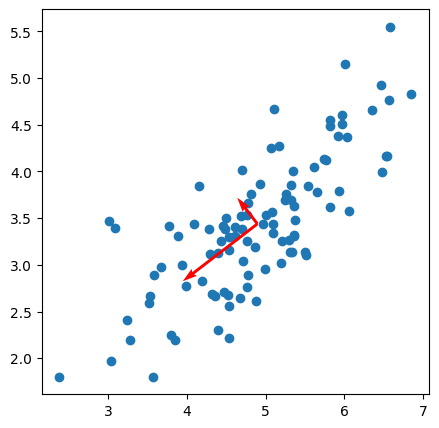

In [13]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], X[1])

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Square root of their lenghts to compare same "units"
    plt.quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

💡 The length of the vector is a measure of the standard deviation of the dataset when projected onto this axis!

💡 We can then use those directions (these "principal components") to "explain" most of our observations behavior - most of the distinction between observations happens along these axis. 

## (3) Apply PCA

We can use these components to project every sample of our dataset onto the directions of maximum variance.

❓ ***Questions*** ❓

1. Use the `transform` method of your `pca` on `X` and store the result in `X_transformed`  
2. Plot your projected features in `X_transformed`against one another.  
3.  Compute the correlation between your transformed features in `X_transformed`

In [14]:
X_transformed = pca.transform(X)

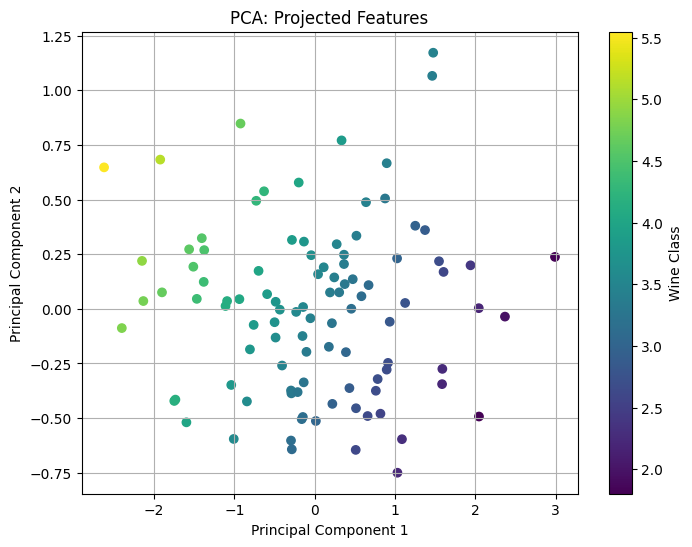

In [22]:
import matplotlib.pyplot as plt

# Plotting the first two principal components against each other
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=X[1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Projected Features')
plt.colorbar(label='Wine Class')
plt.grid(True)
plt.show()

In [18]:
import seaborn as sns
pd.DataFrame(X_transformed).corr()

,0,1
0,1.000000e+00,4.947164e-16
1,4.947164e-16,1.000000e+00


☝️ There is no correlation at all between your transformed features.  

This makes it easier to study the behaviour between observations since they are no longer packed along a single line.

🏁 **Don't forget to push your notebook.**  

Proceed with the challenges of the day and come back here if you have time 😉

## 4. With a little help from Scaling

Remember that the `projections` obtained with the `PCA` is nothing more than the dot product of your initial `X` and your *transposed* components (when we say components, we mean the eigenvectors you produced when you do `pca.components_`)

👉 Compute your projected values manually by performing the dot product: $X.PC^T$.  

❓ Use `np.allclose`, to check that your `X_transformed` is equal to your dot product $X.PC^T$.

In [23]:
PC = pca.components_.T

np.allclose(X_transformed, X.dot(PC))

False

It's not equal 😱  

When the `PCA` of `sklearn` applies the reduction, it does so on a `X` that is, *centered*, but not *scaled*.

This means that `PCA().transform(X)` is actually equivalent to `np.dot(X - X.mean(axis=0), PC)`

In [24]:
np.allclose(X_transformed, np.dot(X - X.mean(axis=0), PC))

True

That is why when using a `PCA` we often recommend to scale, more precisely standardize, your data first so that they are already centered.

This way, using `PCA` or dot product will be equivalent

## 5) Find anomalous behaviour!

The code cell below will load a DataFrame containing information for 8 bearings measured over 2156 time steps! We have been told that the bearings performed well from time steps 0-800. 

We are going to be using code similar to that which you have seen in today's lecture throughout this part of the challenge so make sure you check the demonstration if you get stuck!


In [25]:
import pandas as pd
df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/b2b_python_analytics/Air_Liquide_Variant/bearings_pca.csv")

First up, let's split off the first 800 observations and then scale them with a StandardScaler.

In [28]:
X = df[:800]
#⚠️ Data must be centered around its mean before applying PCA ⚠️
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Bearing 5,Bearing 6,Bearing 7,Bearing 8
0,-2.286547,-2.227528,-2.157634,-2.093389,-2.258344,-2.219896,-1.860686,-1.744665
1,-2.343755,-2.270613,-2.009988,-1.972378,-2.202630,-2.186893,-1.836317,-2.344472
2,-2.183911,-2.088153,-1.959757,-1.824144,-1.976534,-2.035126,-1.737244,-1.867595
3,-2.199876,-2.084839,-2.015303,-1.911888,-2.049600,-2.020695,-1.677485,-1.836903
4,-2.213879,-2.019167,-2.044813,-2.010762,-2.007659,-2.091440,-1.719044,-1.850159
...,...,...,...,...,...,...,...,...
795,0.659257,0.660715,0.464405,0.405186,0.501252,0.529953,0.394015,0.374526
796,0.588738,0.525941,0.378069,0.431086,0.549804,0.402093,0.303251,0.299403
797,0.607556,0.607183,0.477125,0.434718,0.371118,0.402386,0.356650,0.433032
798,0.582487,0.603411,0.382602,0.401431,0.616292,0.526951,0.375775,0.332536


Next, fit a PCA model on this first, scaled 800 rows of the data - this will act as our baseline since we know the bearings were behaving well here! Once you're done, look at the `explained_variance_ratio` of your model.

In [29]:
pca2 = PCA()
pca2.fit(X)

PCA()

In [33]:
explained_variance_ratio = pca2.explained_variance_ratio_
explained_variance_ratio

array([9.24723007e-01, 3.93512163e-02, 2.57367505e-02, 8.12672031e-03,
       8.08990154e-04, 5.16474165e-04, 3.93572903e-04, 3.43268873e-04])

Look at the cumulative sum of the explained variance by the PCA vectors - how many PCA components do we need to explain 90% of the variance in our dataset?

In [42]:
# Calculate cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

# Determine the number of components to keep for explaining at least 80% of the variance
n_components = np.where(cumulative_variance_ratio >= 0.9)[0][0] + 1
n_components

1

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult('components',
                         n_components = n_components)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-8.1.1, pluggy-1.4.0 -- /home/tatchiwiggers/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/tatchiwiggers/SageMaker/code/lewagon/03-Decision-Science/07-PCA-Profiling/data-pca-al/tests
plugins: anyio-4.3.0
collecting ... collected 1 item

test_components.py::TestComponents::test_minimal_pc PASSED               [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/components.pickle

git commit -m 'Completed components step'

git push origin master



Now __fit__ a model with the appropriate number of components on our __reduced__ dataset. Then __transform__ the __entire__ dataset (make sure to scale using the scaler from before first) using your fitted model!

In [ ]:
# YOUR CODE HERE

Finally, we'll need to calculate our T2 Hotellings metrics and our PCA model distance. You can find the code required for this step in todays slides! 


In [ ]:
# YOUR CODE HERE

Lastly, all we need to do is to plot out our residuals and T2 statistics. It should become very clear where our bearings start to misbehave!

In [ ]:
# YOUR CODE HERE

With two convenient graphs, we have been able to visualize when a simple process (e.g. ball bearings spinning in a machine) starts to behave anomalously. If we wanted, we could easily set up a threshold and have a model designed to flag whenever our machinery started to breakd down 🎉

Great work! Don't forget to push your code to GitHub 💪